In [73]:

import matplotlib.pyplot as plt 
from get_processed_data import get_processed_data
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import roc_curve, auc
from show_metrics import show_metrics

In [74]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_smote, y_smote = smote(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_ncr, y_ncr = ncr(X_train, y_train)
X_smote_scaled = scaler.transform(X_smote)
X_over_scaled = scaler.transform(X_over)
X_under_scaled = scaler.transform(X_under)
X_ncr_scaled = scaler.fit_transform(X_ncr)



```No Sampling```

Lasso Coefficients: [-0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.02619655 -0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.         -0.02691296  0.
  0.00883222]


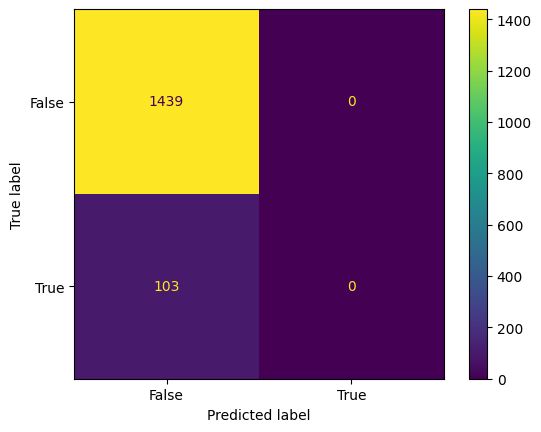

Accuracy: 0.9332036316472114
Precision: 0.0
Recall: 0.0
Specificity: 1.0
F1_score: 0.0


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


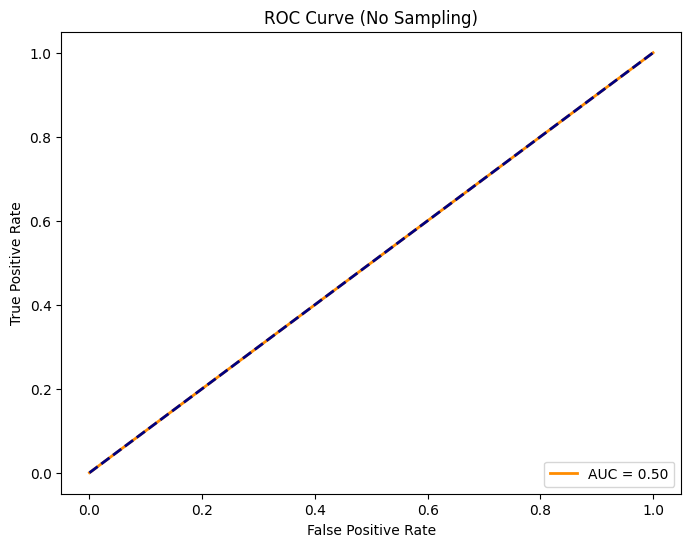

In [76]:
alpha_param = 0.01

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_train_scaled, y_train)

# Print the coefficients
print("Lasso Coefficients:", lasso_model.coef_)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

show_metrics(y_test, y_pred_binary)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (No Sampling)')
plt.legend(loc='lower right')
plt.show()

```SMOTE```

Lasso Coefficients: [-0.00060486 -0.02007423 -0.00262683 -0.14454268 -0.15785612 -0.06389691
 -0.14396778 -0.1317394  -0.1717708  -0.05065556 -0.02549622 -0.02398128
 -0.         -0.00613601 -0.05529338 -0.02413861 -0.01345589 -0.
 -0.         -0.         -0.         -0.         -0.01298009 -0.00985627
 -0.00898931 -0.00469795 -0.         -0.07174012 -0.04711114 -0.
 -0.00252287 -0.          0.08822445 -0.         -0.01464087 -0.00620355
 -0.         -0.00507835  0.00701703 -0.01423673 -0.         -0.0006112
 -0.01804349 -0.04154571 -0.01360187 -0.01014468 -0.         -0.
 -0.00324694  0.01339143 -0.00825668 -0.02433189 -0.22704941 -0.11640704
 -0.07503174]


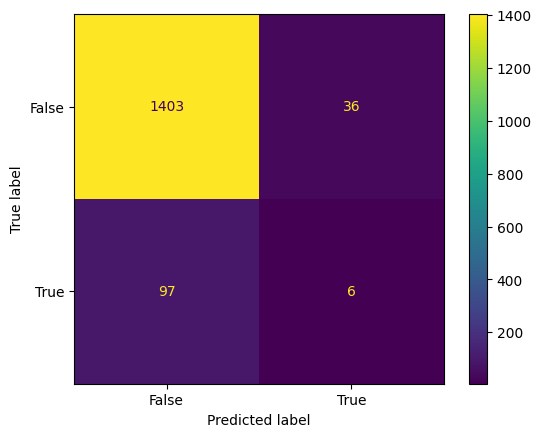

Accuracy: 0.9137483787289234
Precision: 0.14285714285714285
Recall: 0.05825242718446602
Specificity: 0.9749826268241835
F1_score: 0.08275862068965517


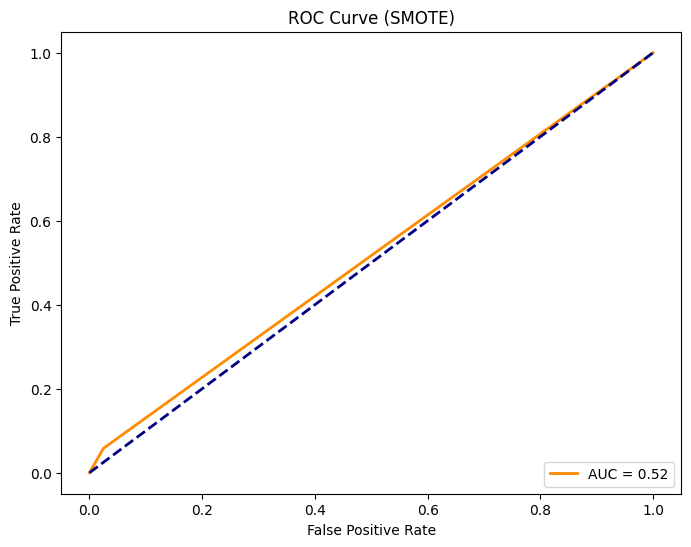

In [77]:
alpha_param = 0.01

lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_smote_scaled, y_smote)

print("Lasso Coefficients:", lasso_model.coef_)

y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

show_metrics(y_test, y_pred_binary)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE)')
plt.legend(loc='lower right')
plt.show()

```Over-Sampling```

Lasso Coefficients: [-0.         -0.          0.00298399  0.          0.          0.
 -0.         -0.         -0.00279218  0.00954463 -0.         -0.
 -0.         -0.         -0.00630703  0.          0.         -0.
 -0.          0.00102848 -0.         -0.         -0.00154308  0.
 -0.0111521   0.          0.01148321 -0.          0.          0.00078112
 -0.         -0.02529392  0.19170228  0.         -0.         -0.
  0.00441613 -0.          0.01501974 -0.         -0.0055321  -0.
 -0.00095341 -0.         -0.         -0.         -0.          0.
 -0.00041217  0.03768531 -0.         -0.         -0.19806151  0.
  0.03961487]


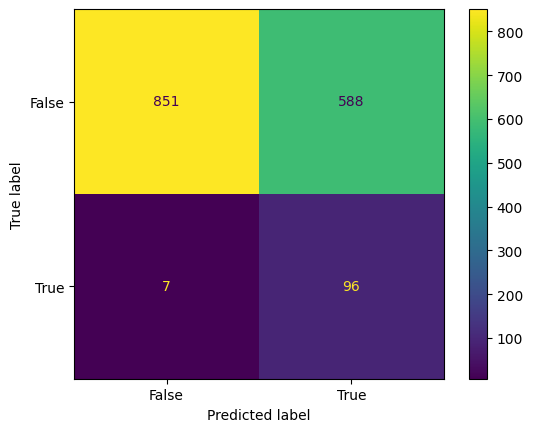

Accuracy: 0.6141374837872893
Precision: 0.14035087719298245
Recall: 0.9320388349514563
Specificity: 0.5913829047949966
F1_score: 0.24396442185514608


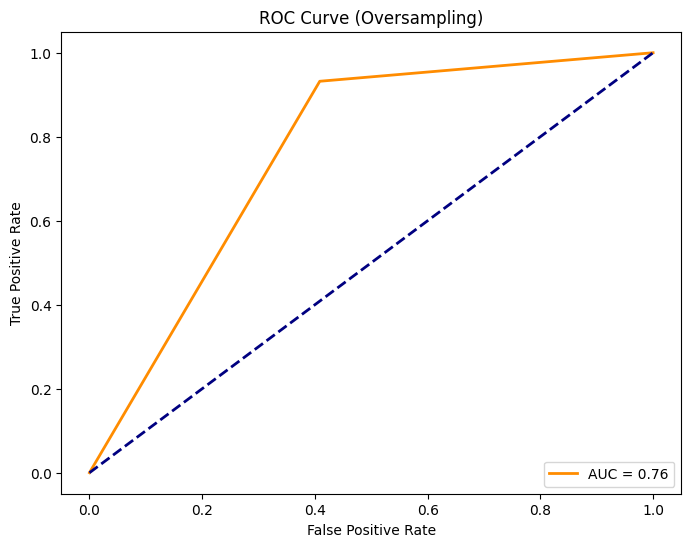

In [78]:
alpha_param = 0.01

lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_over_scaled, y_over)


print("Lasso Coefficients:", lasso_model.coef_)

y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

show_metrics(y_test, y_pred_binary)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Oversampling)')
plt.legend(loc='lower right')
plt.show()

```Undersampling```

Lasso Coefficients: [-0.         -0.01062344  0.00989216  0.         -0.          0.
  0.          0.         -0.0078637   0.00559688 -0.00803667 -0.
  0.         -0.00172309 -0.00659839 -0.          0.         -0.
  0.          0.00030329  0.          0.         -0.0018275  -0.
 -0.00596792 -0.00040017  0.00366014 -0.          0.01032605  0.00728445
 -0.00231164 -0.005769    0.20039395 -0.         -0.00372832  0.
  0.02809212  0.          0.02346685 -0.         -0.         -0.01143003
 -0.         -0.00340681 -0.         -0.         -0.          0.00034694
  0.          0.02605811 -0.00061629  0.         -0.21691349  0.
  0.03866839]


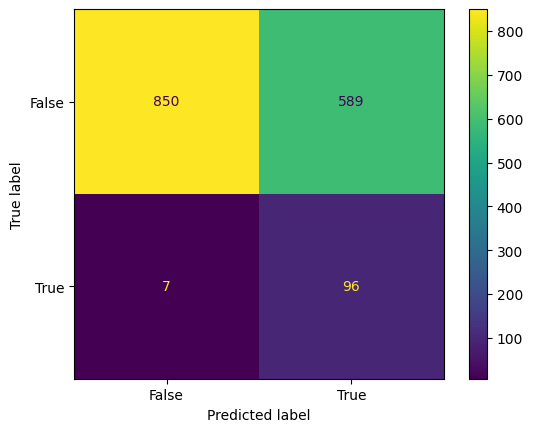

Accuracy: 0.6134889753566797
Precision: 0.14014598540145987
Recall: 0.9320388349514563
Specificity: 0.590687977762335
F1_score: 0.2436548223350254


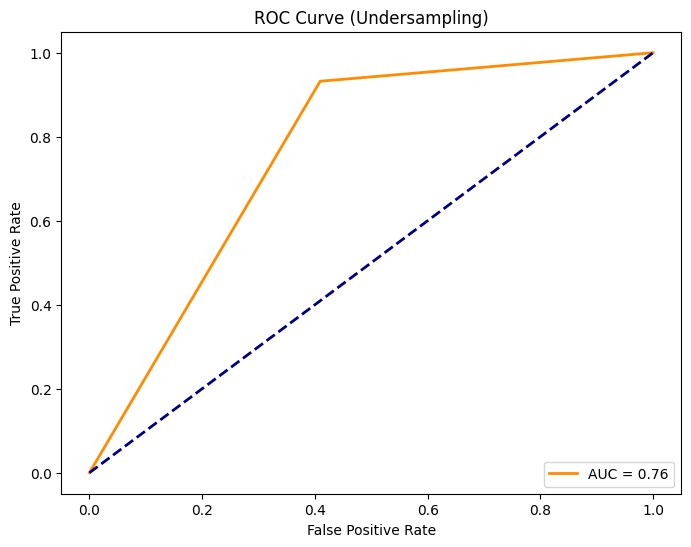

In [79]:
alpha_param = 0.01

lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_under_scaled, y_under)

print("Lasso Coefficients:", lasso_model.coef_)

y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

show_metrics(y_test, y_pred_binary)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Undersampling)')
plt.legend(loc='lower right')
plt.show()

```NCR```

Lasso Coefficients: [-0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.00019308 -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
  0.          0.         -0.          0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.03289708 -0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.00280302 -0.         -0.          0.
 -0.          0.          0.         -0.         -0.03477418  0.
  0.01124673]


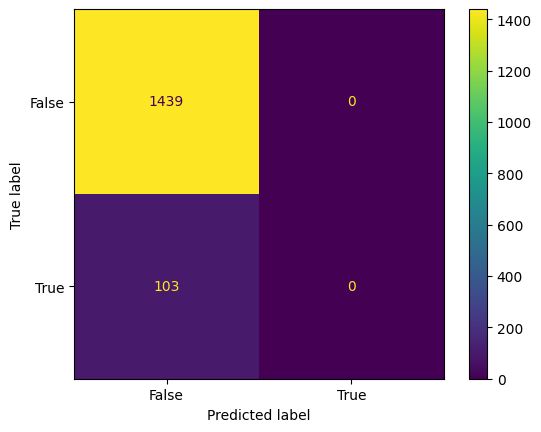

Accuracy: 0.9332036316472114
Precision: 0.0
Recall: 0.0
Specificity: 1.0
F1_score: 0.0


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


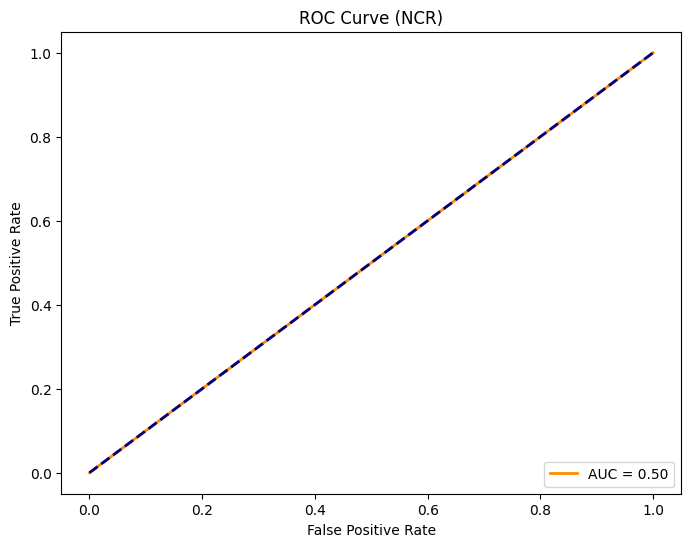

In [80]:
alpha_param = 0.01

lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_ncr_scaled, y_ncr)

print("Lasso Coefficients:", lasso_model.coef_)

y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

show_metrics(y_test, y_pred_binary)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (NCR)')
plt.legend(loc='lower right')
plt.show()

```Hyper Parameter Tuning (Doesnt seem to help much so can delete??)```

In [81]:
# lasso = Lasso()
# param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_over_scaled, y_over)
# print("Best Parameters: ", grid_search.best_params_)

In [82]:
# best_lasso_model = Lasso(alpha=0.001)
# best_lasso_model.fit(X_under_scaled, y_under)
# y_pred_tuned = best_lasso_model.predict(X_test_scaled)
# y_pred_binary = (y_pred_tuned > 0.5).astype(int)

# accuracy = accuracy_score(y_test, y_pred_binary)
# conf_matrix = confusion_matrix(y_test, y_pred_binary)
# precision = precision_score(y_test, y_pred_binary)
# recall = recall_score(y_test, y_pred_binary)
# f1 = f1_score(y_test, y_pred_binary)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", conf_matrix)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()